In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


<b> loading cleaning data

In [166]:
Round3_df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [167]:
Round3_df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

<b> checking correlations between numerical variables

In [169]:
Round3_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


check if there are highly correlated features and drop them if there are any.

In [170]:
Round3_df_multicollinearity_df=Round3_df.corr()
Round3_df_multicollinearity_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [171]:
Round3_df= Round3_df.select_dtypes(exclude=[np.number])
Round3_df_categoricals_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


Ordinal encoding

In [172]:
Round3_df.education.unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [173]:
education1 = {"high school or below":1, "college":2, "bachelor":3,"master":4, "doctor":5}
Round3_df["education"] = Round3_df["education"].replace(education1)

In [174]:
Round3_df.coverage.unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [175]:
coverage1 = {"basic":1, "extended":2, "premium":3}
Round3_df["coverage"] = Round3_df["coverage"].replace(coverage1)

In [176]:
Round3_df.employment_status.unique()

array(['employed', 'unemployed', 'medical leave', 'disabled', 'retired'],
      dtype=object)

In [177]:
employment_status1 = {"disabled":1, "retired":2, "medical leave":3, "unemployed":4, "employed":5}
Round3_df["employment_status"] = Round3_df["employment_status"].replace(employment_status1)

In [178]:
Round3_df.vehicle_class.unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury car',
       'luxury suv'], dtype=object)

In [179]:
vehicle_class1 = {"two-door car":1, "four-door car":1, "sports car":2, "suv":2, "luxury car":3, "luxury suv":3}
Round3_df["vehicle_class"] = Round3_df["vehicle_class"].replace(vehicle_class1)

In [180]:
Round3_df.vehicle_size.unique()

array(['medsize', 'small', 'large'], dtype=object)

In [181]:
vehicle_size1 = {"small":1, "medsize":2, "large":3}
Round3_df["vehicle_size"] = Round3_df["vehicle_size"].replace(vehicle_size1)

In [182]:
Round3_df.renew_offer_type.unique()

array(['offer3', 'offer4', 'offer2', 'offer1'], dtype=object)

In [183]:
renew_offer_type1 = {"offer1":1, "offer2":2, "offer3":3, "offer4":4}
Round3_df["renew_offer_type"] = Round3_df["renew_offer_type"].replace(renew_offer_type1)

In [184]:
Round3_df.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,1,2,2/18/11,feb,5,m,suburban,married,corporate auto,corporate l3,3,agent,1,2
1,west region,no,1,2,1/18/11,jan,4,f,suburban,single,personal auto,personal l3,4,call center,1,2
2,east,no,1,3,2/10/11,feb,5,m,suburban,single,personal auto,personal l3,3,call center,2,2
3,north west,yes,2,2,1/11/11,jan,5,m,suburban,single,corporate auto,corporate l3,2,branch,1,2
4,north west,no,3,3,1/17/11,jan,3,f,suburban,married,personal auto,personal l2,1,branch,1,2


One Hot Encoding

In [185]:
Round3_df.region.unique()

array(['central', 'west region', 'east', 'north west'], dtype=object)

In [186]:
Round3_df.response.unique()

array(['no', 'yes'], dtype=object)

In [187]:
Round3_df.gender.unique()

array(['m', 'f'], dtype=object)

In [188]:
Round3_df.location_code.unique()

array(['suburban', 'urban', 'rural'], dtype=object)

In [189]:
Round3_df.marital_status.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [190]:
Round3_df.policy_type.unique()

array(['corporate auto', 'personal auto', 'special auto'], dtype=object)

In [191]:
Round3_df.policy.unique()

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

In [192]:
Round3_df.sales_channel	.unique()

array(['agent', 'call center', 'branch', 'web'], dtype=object)

In [193]:
cate_df = pd.get_dummies(Round3_df, columns=["policy", "policy_type", 'gender', "marital_status","region","response","location_code","sales_channel","month"], prefix= "dmy")

In [194]:
cate_df

,coverage,education,effective_to_date,employment_status,renew_offer_type,vehicle_class,vehicle_size,dmy_corporate l1,dmy_corporate l2,dmy_corporate l3,...,dmy_yes,dmy_rural,dmy_suburban,dmy_urban,dmy_agent,dmy_branch,dmy_call center,dmy_web,dmy_feb,dmy_jan
0,1,2,2/18/11,5,3,1,2,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,1,2,1/18/11,4,4,1,2,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,3,2/10/11,5,3,2,2,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,2,2,1/11/11,5,2,1,2,0,0,1,...,1,0,1,0,0,1,0,0,0,1
4,3,3,1/17/11,3,1,1,2,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,3,3,1/19/11,4,3,3,2,0,0,0,...,0,0,1,0,0,0,0,1,0,1
10685,1,2,1/6/11,5,2,1,2,0,0,0,...,0,0,0,1,0,1,0,0,0,1
10686,2,3,2/6/11,5,1,3,2,0,0,1,...,0,1,0,0,0,0,0,1,1,0
10687,3,2,2/13/11,5,1,2,2,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [195]:
cate_df = cate_df.drop(labels=['effective_to_date'], axis=1)

In [196]:
cate_df

,coverage,education,employment_status,renew_offer_type,vehicle_class,vehicle_size,dmy_corporate l1,dmy_corporate l2,dmy_corporate l3,dmy_personal l1,...,dmy_yes,dmy_rural,dmy_suburban,dmy_urban,dmy_agent,dmy_branch,dmy_call center,dmy_web,dmy_feb,dmy_jan
0,1,2,5,3,1,2,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,1,2,4,4,1,2,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,3,5,3,2,2,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,2,2,5,2,1,2,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,3,3,3,1,1,2,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,3,3,4,3,3,2,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
10685,1,2,5,2,1,2,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
10686,2,3,5,1,3,2,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
10687,3,2,5,1,2,2,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


Linear Regression
- X-y split (y is the target variable, which is the total claim amount)
- Train-test split.
- Standardize the data (after the data split).
- Apply linear regression.
- Model Interpretation.

In [197]:
numerical_df=pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [198]:
numerical_df = numerical_df.select_dtypes(include=[np.number])
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [200]:
y_col = 'total_claim_amount'
y = numerical_df[y_col]
x = numerical_df[numerical_df.columns.drop(y_col)]

In [201]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=42)

In [202]:
std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)

In [203]:
x_train.shape

(7482, 7)

In [204]:
x_test_scaled=std_scaler.transform(x_test)

In [205]:
print(x_train_scaled)
print("--------")
print(x_test_scaled)

[[ 0.09537036 -0.38616002 -0.2975471  ...  1.49683921  0.68183709
  -0.41232904]
 [-0.55139048 -1.59933399  0.45573807 ... -0.5121996  -0.41999987
  -0.82917079]
 [-0.82084995 -1.28788435 -0.87699722 ...  1.71209337 -0.41999987
  -0.82917079]
 ...
 [-0.54732098 -1.28909716 -0.84802472 ... -1.44496762  3.98734797
   2.08872151]
 [ 0.71713282  1.02437858  0.36882055 ...  1.49683921 -0.41999987
  -0.41232904]
 [-0.15403225  0.47238827  0.19498551 ...  0.20531426 -0.41999987
   1.67187975]]
--------
[[-0.45575708  0.84601464 -0.93494224 ...  1.06633089 -0.41999987
   0.83819624]
 [ 0.17821389 -0.36873598  0.6295731  ...  1.06633089 -0.41999987
   0.00451272]
 [-0.69818339  0.67306792 -0.38446462 ... -0.11756698 -0.41999987
  -0.82917079]
 ...
 [-0.77724809 -1.22995245 -0.64521717 ...  0.27706565 -0.41999987
  -0.82917079]
 [-0.48438897 -0.6424268   0.71649062 ...  0.06181149  0.68183709
  -0.82917079]
 [ 2.08099884  1.92108996 -0.67418968 ... -0.76332945 -0.41999987
  -0.41232904]]


In [206]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     738.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:12:39   Log-Likelihood:                -51177.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.3067      2.615    165.674      0.0

In [207]:
predictions_test

array([227.77325245, 557.51126627, 337.04484372, ..., 356.74506197,
       588.82009904, 230.30402597])

In [208]:
#display adjusted R-squared
print(model.rsquared_adj)

0.40813883733613954


### Modeling using Scikit Learn

Model fitting

In [209]:
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)   # model train

LinearRegression()

<b> model parameters  ( b1,b2,b3,b4)

In [210]:
x_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
10237,8663,42169,83,18,90,1,2
2689,4213,12160,109,5,34,0,1
4489,2359,19864,63,22,96,0,1
10401,19511,40625,70,28,26,0,2
749,3576,24959,89,19,13,0,1
...,...,...,...,...,...,...,...
5734,7610,98701,94,22,66,0,3
5191,35186,86134,98,17,78,0,2
5390,4241,19834,64,26,8,4,8
860,12941,77060,106,23,90,0,2


In [211]:
model.coef_

array([ -6.04221236, -34.35264853, 187.28585793,   1.60473817,
        -3.61151009,   1.54162247,   3.30263844])

In [212]:
model.intercept_

433.3067361668003

<b> Making prediction

In [213]:
y_pred=model.predict(x_test_scaled)   # model prediction

y_pred_train=model.predict(x_train_scaled)

In [214]:
y_pred

array([227.77325245, 557.51126627, 337.04484372, ..., 356.74506197,
       588.82009904, 230.30402597])

In [215]:
y_test

3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
5928      406
3706      321
7735       45
9320      597
7924       48
Name: total_claim_amount, Length: 3207, dtype: int64

## Evaluating Model Performance

In [238]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

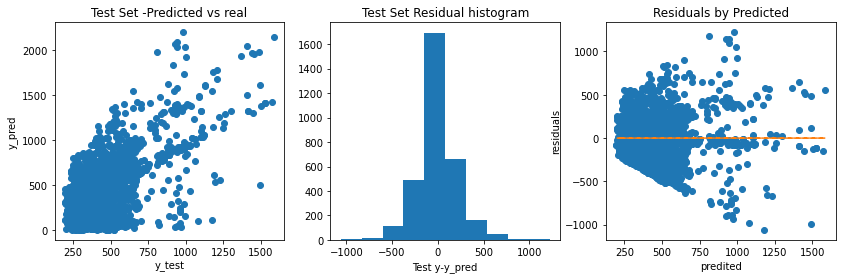

In [239]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<b>more fancy using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

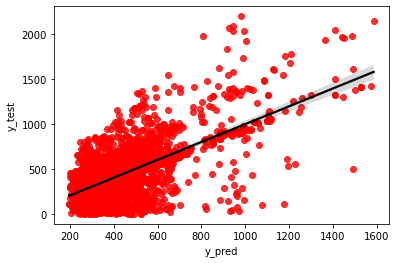

In [240]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

Model Evaluation:
- MSE.
- RMSE.
- MAE.
- R2.
- Adjusted R2.
- Feature Importance.

In [219]:
MSE = mse(y_test, y_pred)
MSE

49154.64390326823

In [228]:
RMSE = math.sqrt(MSE)
RMSE

221.70846601622642

In [230]:
MAE = mae(y_test, y_pred)
MAE

152.83216224246735

In [231]:
R2 = r2_score(y_test, y_pred)
R2

0.4114006217055418

In [234]:
Adj_r2 = 1-(1-R2)*(3207-1)/(3207-7-1)
Adj_r2

0.4101126580768888

In [235]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [236]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.285858
1,income,34.352649
0,customer_lifetime_value,6.042212
4,months_since_policy_inception,3.611510
6,number_of_policies,3.302638
3,months_since_last_claim,1.604738
5,number_of_open_complaints,1.541622
